# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


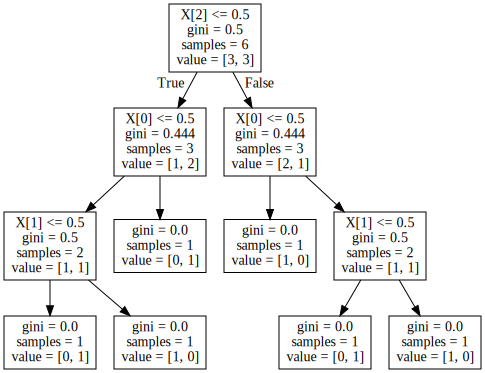

In [6]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/galat/.conda/envs/aaut/Library/bin/graphviz'
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)  
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [8]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [9]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

# Fit the learning model on training set

In [10]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [11]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

# Look at the specific examples

In [12]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [13]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [15]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [16]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [17]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


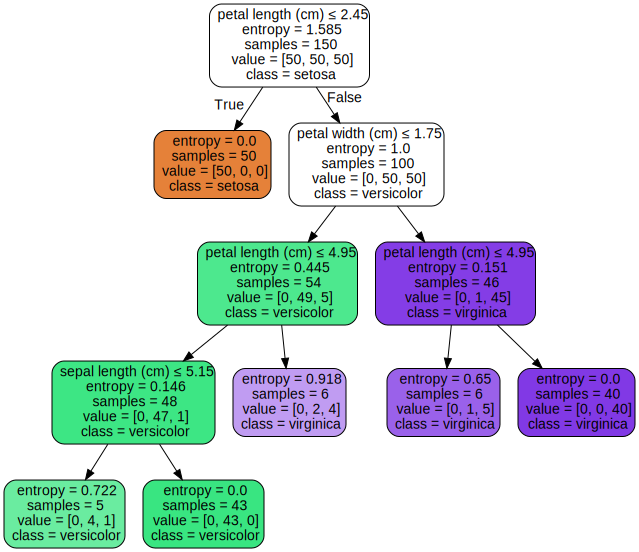

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 1. Artificial inflation

In [19]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(42)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [20]:
samples_x = []
samples_y = []
for i in range(0, len(iris_y_train)):
    if iris_y_train[i] == 1:
        for _ in range(9):
            samples_x.append(iris_X_train[i])
            samples_y.append(1)
    elif iris_y_train[i] == 2:
        for _ in range(9):
            samples_x.append(iris_X_train[i])
            samples_y.append(2)

#Samples inflation
iris_X_train = np.append(iris_X_train, samples_x, axis = 0)
iris_y_train = np.append(iris_y_train, samples_y, axis = 0)

In [21]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=10,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris_X_train, iris_y_train)
predicted_y_test = clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test)
f1 = f1_score(iris_y_test, predicted_y_test, average='macro')
print("Accuracy: ", acc_score)
print("F1: ", f1)

Accuracy:  0.9
F1:  0.9153439153439153


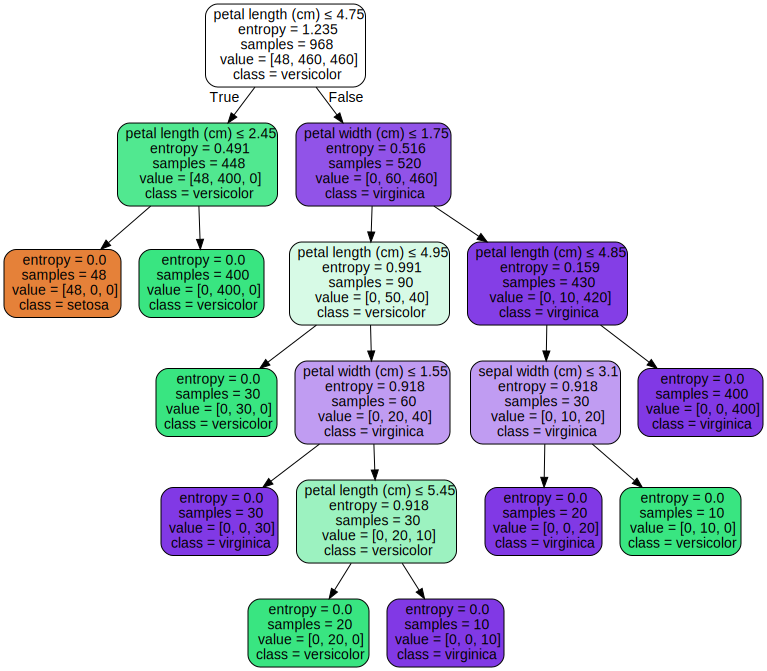

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 2. Class weights

In [23]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(1231)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:10})
clf = clf.fit(iris_X_train, iris_y_train)
predicted_y_test = clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test)
f1 = f1_score(iris_y_test, predicted_y_test, average='macro')
print("Accuracy: ", acc_score)
print("F1: ", f1)

Accuracy:  0.8
F1:  0.5


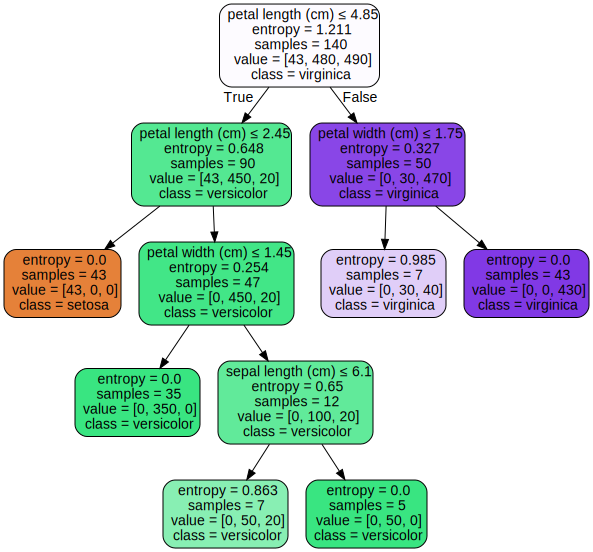

In [25]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 3. Avoid overfitting

In [32]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(42)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [33]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=3,class_weight={0:1,1:10,2:10}, min_impurity_decrease = 0.005, max_depth = 4, max_leaf_nodes = 6)
clf = clf.fit(iris_X_train, iris_y_train)
predicted_y_test = clf.predict(iris_X_test)
acc_score = accuracy_score(iris_y_test, predicted_y_test)
f1 = f1_score(iris_y_test, predicted_y_test, average='macro')
print("Accuracy: ", acc_score)
print("F1: ", f1)

Accuracy:  0.9
F1:  0.9153439153439153


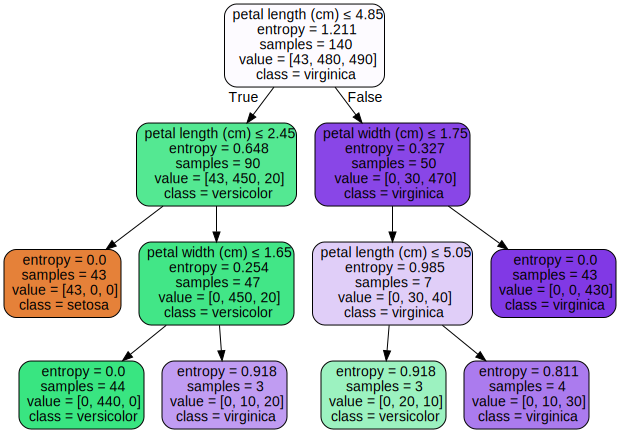

In [28]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# 4. Confusion Matrix

In [34]:
# initializes the confusion matrix
confusion = np.zeros([3, 3], dtype = int)

# print the corresponding instances indexes and class names
for i in range(len(iris_y_test)): 
    #increments the indexed cell value
    confusion[iris_y_test[i], predicted_y_test[i]]+=1
confusion

array([[2, 0, 0],
       [0, 4, 0],
       [0, 1, 3]])

# 5. ROC Curves

In [37]:
# Calculates the ROC curves (x, y)
leafs = []
class_pairs = [[],[],[]]
roc_curves = [[[0], [0]], [[0], [0]], [[0], [0]]]
for i in range(clf.tree_.node_count):
    if (clf.tree_.feature[i] == -2):
        leafs.append(i)

# c = class index
for leaf in leafs:
    for c in range(3):
        #pairs(neg, pos)
        class_pairs[c].append((clf.tree_.value[leaf][0].sum() - clf.tree_.value[leaf][0][c], clf.tree_.value[leaf][0][c]))

#pairs sorting
for c in range(3):
    class_pairs[c] = sorted(class_pairs[c], key=lambda t: t[0]/max(1,t[1]))
print(class_pairs)

for i in range(1, len(leafs) + 1):
    for c in range(3):
        roc_curves[c][0].append(class_pairs[c][i - 1][0] + roc_curves[c][0][i - 1])
        roc_curves[c][1].append(class_pairs[c][i - 1][1] + roc_curves[c][1][i - 1])

roc_curves

[[(0.0, 48.0), (30.0, 0.0), (30.0, 0.0), (60.0, 0.0), (400.0, 0.0), (400.0, 0.0)], [(0.0, 400.0), (0.0, 30.0), (20.0, 10.0), (40.0, 20.0), (48.0, 0.0), (400.0, 0.0)], [(0.0, 400.0), (10.0, 20.0), (20.0, 40.0), (30.0, 0.0), (48.0, 0.0), (400.0, 0.0)]]


[[[0, 0.0, 30.0, 60.0, 120.0, 520.0, 920.0],
  [0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]],
 [[0, 0.0, 0.0, 20.0, 60.0, 108.0, 508.0],
  [0, 400.0, 430.0, 440.0, 460.0, 460.0, 460.0]],
 [[0, 0.0, 10.0, 30.0, 60.0, 108.0, 508.0],
  [0, 400.0, 420.0, 460.0, 460.0, 460.0, 460.0]]]

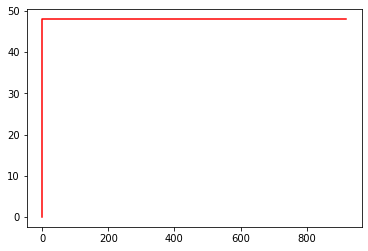

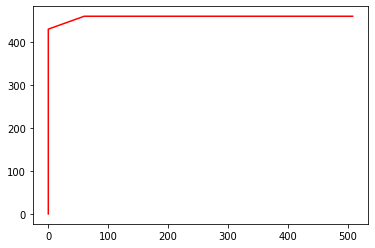

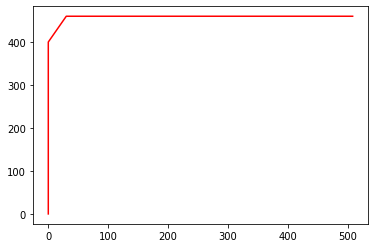

In [36]:
import matplotlib.pyplot as plt

# Not ordered
for c in range(3):
    plt.plot(roc_curves[c][0], roc_curves[c][1], color = "red")
    plt.show()